In [1]:
from pathlib import Path
import re

import scope
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", font_scale=1.1, palette="Paired")
plt.rcParams['figure.dpi'] = 300

In [9]:
def _read_float_file(path: Path):
    reader = scope.Reader(path)
    steps, episode_scores = reader['episode/score']
    return np.asarray(episode_scores)[:200]

def plot(files_labels=[], output=None):
    plt.figure(figsize=(10, 6))

    bars = []
    labels = []
    for path, label in files_labels:
        bars.append(_read_float_file(Path(path)).mean())
        labels.append(label)

    sns.barplot(y=bars, x=labels, hue=labels)

    plt.xlabel("Environment Setting")
    plt.ylabel("Average Reward")
    plt.title(f"Average reward over 200 episodes")
    # plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    if output:
        plt.savefig(output, dpi=300)
        print(f"Saved figure → {output}")

/var/folders/sz/_6t9n1rn6b7bxg8p0wzyw0g00000gn/T/ipykernel_76665/857873898.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


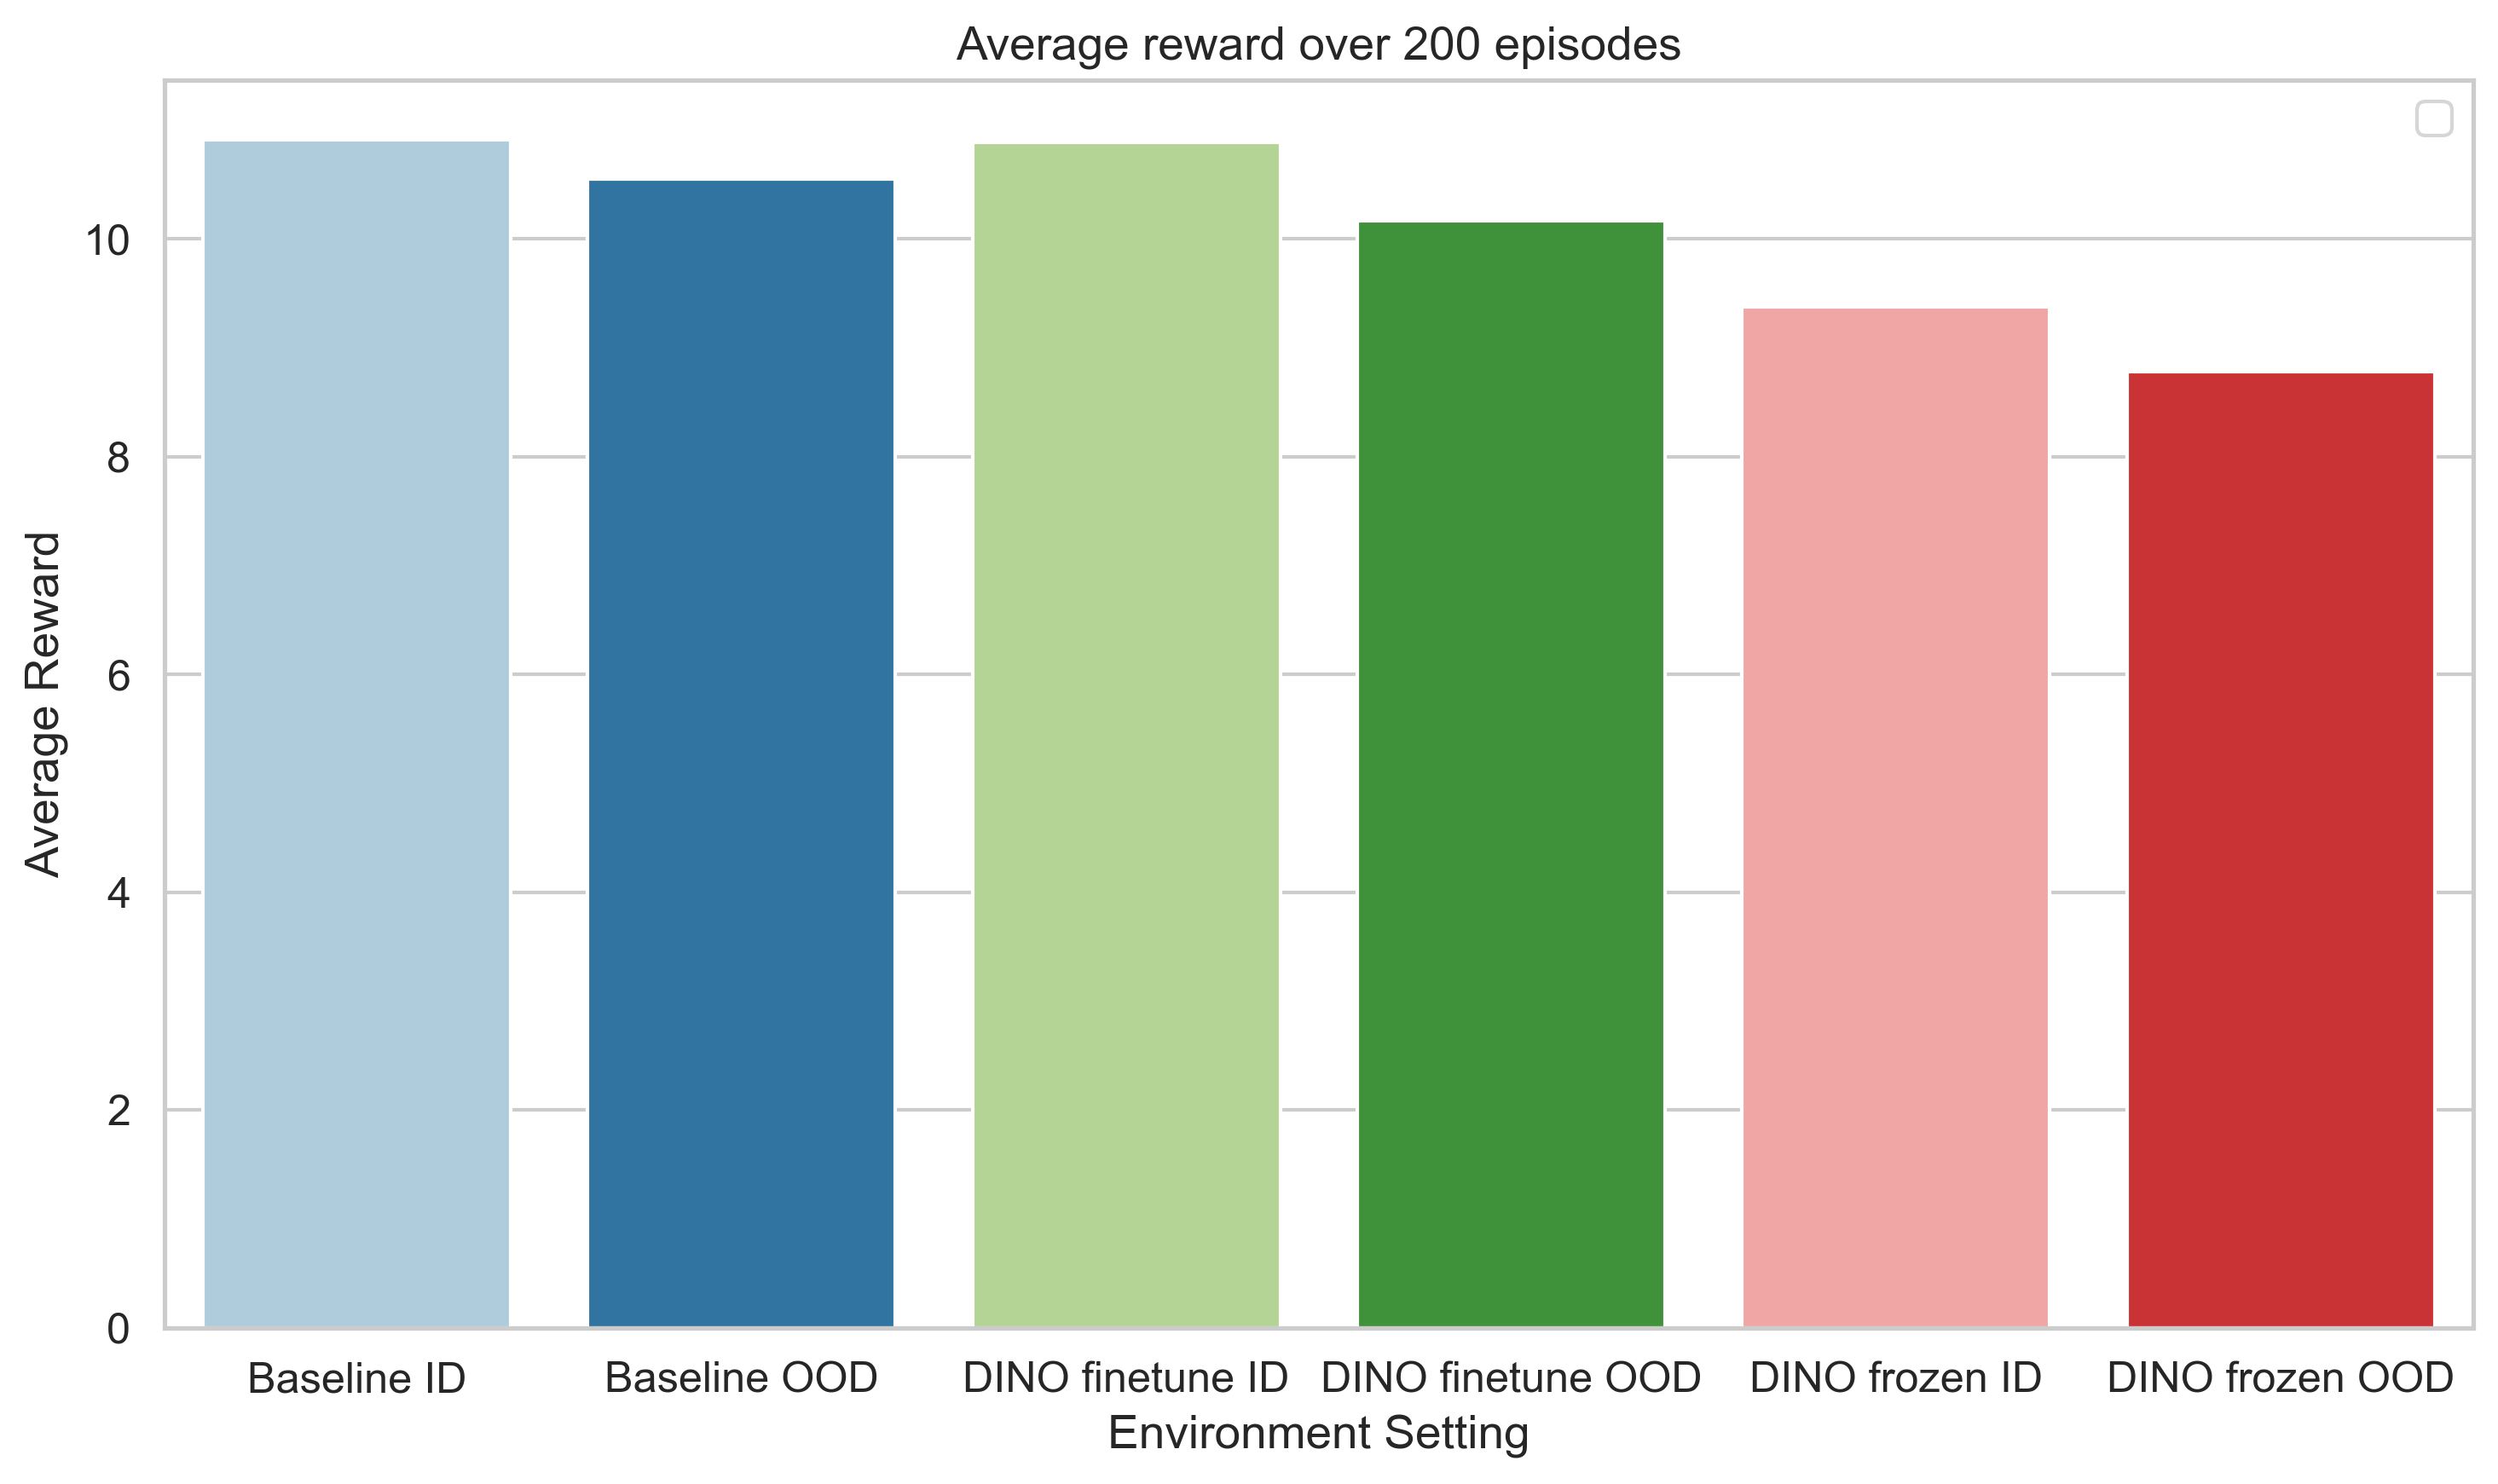

In [10]:
plot(
    files_labels=[
        ("logdir/baseline_pick_ycb_eval_ID/", "Baseline ID"),
        ("logdir/baseline_pick_ycb_eval_OOD/", "Baseline OOD"),
        ("logdir/DINOFT_pick_ycb_eval_ID/", "DINO finetune ID"),
        ("logdir/DINOFT_pick_ycb_eval_OOD/", "DINO finetune OOD"),
        ("logdir/DINOFreeze_pick_ycb_eval_ID/", "DINO frozen ID"),
        ("logdir/DINOFreeze_pick_ycb_eval_OOD/", "DINO frozen OOD"),
    ]
)